In [2]:
# import pip
# !pip install python-chess
import chess
import chess.pgn
import re
# import chess.uci

In [3]:
board = chess.Board()
pgn_mega = open("lichess 2013-01.pgn")

In [4]:
games = []
for i in range(1,10):
    games.append(chess.pgn.read_game(pgn_mega))

In [5]:
for game in games:
    print(game)

[Event "Rated Classical game"]
[Site "https://lichess.org/j1dkb5dw"]
[Date "????.??.??"]
[Round "?"]
[White "BFG9k"]
[Black "mamalak"]
[Result "1-0"]
[BlackElo "1403"]
[BlackRatingDiff "-8"]
[ECO "C00"]
[Opening "French Defense: Normal Variation"]
[Termination "Normal"]
[TimeControl "600+8"]
[UTCDate "2012.12.31"]
[UTCTime "23:01:03"]
[WhiteElo "1639"]
[WhiteRatingDiff "+5"]

1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8# 1-0
[Event "Rated Classical game"]
[Site "https://lichess.org/a9tcp02g"]
[Date "????.??.??"]
[Round "?"]
[White "Desmond_Wilson"]
[Black "savinka59"]
[Result "1-0"]
[BlackElo "1919"]
[BlackRatingDiff "-22"]
[ECO "D04"]
[Opening "Queen's Pawn Game: Colle System, Anti-Colle"]
[Termination "Normal"]
[TimeControl "480+2"]
[UTCDate "2012.12.31"]
[UTCTime "23:04:12"]
[WhiteElo "1654"]
[WhiteRatingDiff "+19"]

1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nxg6 hxg6 6. Nd2 e6 7. Bd3 

In [6]:
game1 = games[1]
game1.headers

Headers(Event='Rated Classical game', Site='https://lichess.org/a9tcp02g', Date='????.??.??', Round='?', White='Desmond_Wilson', Black='savinka59', Result='1-0', BlackElo='1919', BlackRatingDiff='-22', ECO='D04', Opening="Queen's Pawn Game: Colle System, Anti-Colle", Termination='Normal', TimeControl='480+2', UTCDate='2012.12.31', UTCTime='23:04:12', WhiteElo='1654', WhiteRatingDiff='+19')

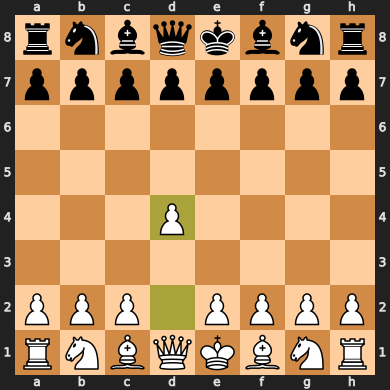

In [15]:
game1.variation(0).board()

In [11]:
type(game1)

chess.pgn.Game

In [12]:
print(game1.headers["Event"], "||", 
      game1.headers["Site"], "||", 
      game1.headers["Date"], "||", 
      game1.headers["Round"], "||", 
      game1.headers["White"], "||", 
      game1.headers["Black"], "||", 
      game1.headers["Result"])

Rated Classical game || https://lichess.org/a9tcp02g || ????.??.?? || ? || Desmond_Wilson || savinka59 || 1-0


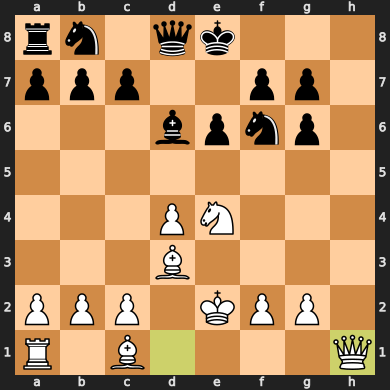

In [13]:
#Very annoying way to iterate through moves and show them on board
game1.variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).variation(0).board()

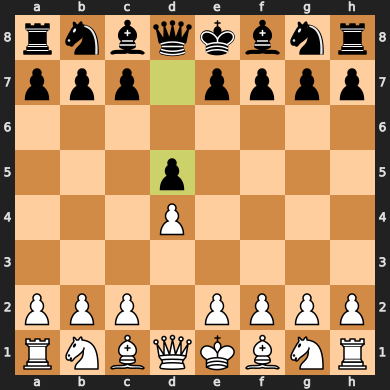

In [14]:
game1.variation(0).variation(0).board()

In [15]:
#check for moves in given board state
board = chess.Board()
type(board)
board.legal_moves.count()
bool(board.legal_moves)
move = chess.Move.from_uci("g1f3")
move in board.legal_moves

True

In [16]:
#get list of legal moves
game1.variation(0).variation(0).board().legal_moves

<LegalMoveGenerator at 0x106023ad0 (Nh3, Nf3, Kd2, Qd3, Qd2, Bh6, Bg5, Bf4, Be3, Bd2, Nc3, Na3, Nd2, h3, g3, f3, e3, c3, b3, a3, h4, g4, f4, e4, c4, b4, a4)>

In [19]:
headers = dict(game1.headers)
headers["moves"] = game1.board().variation_san(game1.mainline_moves())
headers["moves"]

'1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nxg6 hxg6 6. Nd2 e6 7. Bd3 Bd6 8. e4 dxe4 9. Nxe4 Rxh2 10. Ke2 Rxh1 11. Qxh1 Nc6 12. Bg5 Ke7 13. Qh7 Nxd4+ 14. Kd2 Qe8 15. Qxg7 Qh8 16. Bxf6+ Kd7 17. Qxh8 Rxh8 18. Bxh8'

In [127]:
game1.board().variation_san(game1.mainline_moves())

'1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nxg6 hxg6 6. Nd2 e6 7. Bd3 Bd6 8. e4 dxe4 9. Nxe4 Rxh2 10. Ke2 Rxh1 11. Qxh1 Nc6 12. Bg5 Ke7 13. Qh7 Nxd4+ 14. Kd2 Qe8 15. Qxg7 Qh8 16. Bxf6+ Kd7 17. Qxh8 Rxh8 18. Bxh8'

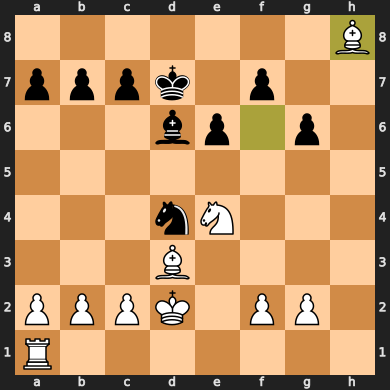

In [21]:
board = game1.board()
for move in game1.mainline_moves():
    board.push(move)


In [43]:
type(game1.mainline_moves())


chess.pgn.Mainline

In [73]:
# print all moves
# type(str(game1.mainline()))
for i,move in enumerate(re.split('\d+\.',str(game1.mainline()))):
    print(i, "...",move)
moves = []
for move in re.split('\d+\.',str(game1.mainline())):
    moves.append(move)
    print(moves.board().legal_moves)

0 ... 
1 ...  d4 d5 
2 ...  Nf3 Nf6 
3 ...  e3 Bf5 
4 ...  Nh4 Bg6 
5 ...  Nxg6 hxg6 
6 ...  Nd2 e6 
7 ...  Bd3 Bd6 
8 ...  e4 dxe4 
9 ...  Nxe4 Rxh2 
10 ...  Ke2 Rxh1 
11 ...  Qxh1 Nc6 
12 ...  Bg5 Ke7 
13 ...  Qh7 Nxd4+ 
14 ...  Kd2 Qe8 
15 ...  Qxg7 Qh8 
16 ...  Bxf6+ Kd7 
17 ...  Qxh8 Rxh8 
18 ...  Bxh8


AttributeError: 'list' object has no attribute 'board'

  # TRY PGN PARSER https://pypi.org/project/pgn-parser/

In [70]:
for i in game1.mainline():
    print(str(i)[:10])

1. d4 d5 2
1... d5 2.
2. Nf3 Nf6
2... Nf6 3
3. e3 Bf5 
3... Bf5 4
4. Nh4 Bg6
4... Bg6 5
5. Nxg6 hx
5... hxg6 
6. Nd2 e6 
6... e6 7.
7. Bd3 Bd6
7... Bd6 8
8. e4 dxe4
8... dxe4 
9. Nxe4 Rx
9... Rxh2 
10. Ke2 Rx
10... Rxh1
11. Qxh1 N
11... Nc6 
12. Bg5 Ke
12... Ke7 
13. Qh7 Nx
13... Nxd4
14. Kd2 Qe
14... Qe8 
15. Qxg7 Q
15... Qh8 
16. Bxf6+ 
16... Kd7 
17. Qxh8 R
17... Rxh8
18. Bxh8


In [48]:
#Chess engine
import chess.engine as en
#https://python-chess.readthedocs.io/en/latest/engine.html


transport, engine = await chess.engine.popen_uci("./stockfish-10-64")

#pass in a board object, get stockfish evaluation
board = game1.variation(0).variation(0).board()
info = await engine.analyse(board, chess.engine.Limit(time=0.1))
print(info["score"])
    # Score: +20

# board = chess.Board("r1bqkbnr/p1pp1ppp/1pn5/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 2 4")
# info = await engine.analyse(board, chess.engine.Limit(depth=20))
# print(info["score"])
#     # Score: #+1

# await engine.quit()


+58


In [45]:
type(game1.board())

chess.Board

In [27]:
game = game1.end()
board = game.board()

In [38]:
#travse and evaluate stockfish
import chess
import chess.engine as en
import chess.pgn
import sys

# arguments = sys.argv
# pgnfilename = str(arguments[1])

#Read pgn file:
# with open(pgnfilename) as f:
#     game = chess.pgn.read_game(f)
game = game1
#Go to the end of the game and create a chess.Board() from it:
game = game.end()
board = game.board()

#So if you want, here's also your PGN to FEN conversion:
# print 'FEN of the last position of the game: ', board.fen()

#or if you want to loop over all game nodes:
#while not game.is_end():
    #node = game.variations[0]
    #board = game.board() #print the board if you want, to make sure
    #game = node         

#Now we have our board ready, load your engine:
# handler = chess.engine.InfoHandler()
engine = chess.engine.popen_uci #give correct address of your engine here
# engine.info_handlers.append(handler)

#give your position to the engine:
engine.position(board)

#Set your evaluation time, in ms:
evaltime = 5000 #so 5 seconds
evaluation = engine.go(movetime=evaltime)

AttributeError: 'function' object has no attribute 'position'